# Loading and Combining the data

In [1]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("DIVVYBikesPrediction").getOrCreate()

# Path to your CSV file
csv_file_path = "./Combined_data.csv"

# Read the CSV file
whole_data = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Show the first few rows
whole_data.show()

# Print the schema to verify column data types
whole_data.printSchema()

+----------------+-------------+-------------------+-------------------+--------------------+----------------+--------------------+--------------+------------------+------------------+-----------------+------------------+-------------+
|         ride_id|rideable_type|         started_at|           ended_at|  start_station_name|start_station_id|    end_station_name|end_station_id|         start_lat|         start_lng|          end_lat|           end_lng|member_casual|
+----------------+-------------+-------------------+-------------------+--------------------+----------------+--------------------+--------------+------------------+------------------+-----------------+------------------+-------------+
|C2F7DD78E82EC875|electric_bike|2022-01-13 11:59:47|2022-01-13 12:02:44|Glenwood Ave & To...|             525|Clark St & Touhy Ave|        RP-007|        42.0128005|        -87.665906|   42.01256011541|    -87.6743671152|       casual|
|A6CF8980A652D272|electric_bike|2022-01-10 08:41:56|2022

# Knowing the Data

In [2]:
from pyspark.sql.functions import col, sum, when

# Calculate the number of null values in each column
null_counts = whole_data.select(
    [(sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)) for c in whole_data.columns]
)

# Show the result
null_counts.show()

+-------+-------------+----------+--------+------------------+----------------+----------------+--------------+---------+---------+-------+-------+-------------+
|ride_id|rideable_type|started_at|ended_at|start_station_name|start_station_id|end_station_name|end_station_id|start_lat|start_lng|end_lat|end_lng|member_casual|
+-------+-------------+----------+--------+------------------+----------------+----------------+--------------+---------+---------+-------+-------+-------------+
|      0|            0|         0|       0|           1708780|         1708912|         1821944|       1822085|        0|        0|  12848|  12848|            0|
+-------+-------------+----------+--------+------------------+----------------+----------------+--------------+---------+---------+-------+-------+-------------+



<ipython-input-3-3529615711e7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts_pd["rideable_type"], y=null_counts_pd["null_count"], palette="viridis")


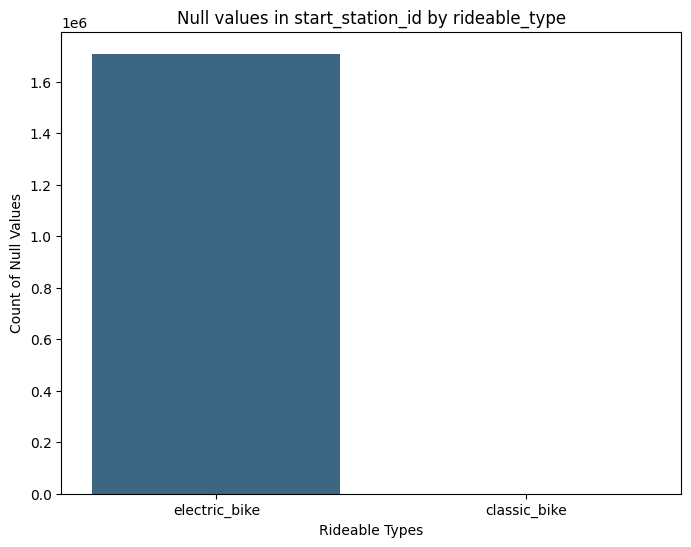

In [3]:
from pyspark.sql.functions import col, count
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows where 'start_station_id' is null
null_start_station_id_data = whole_data.filter(col("start_station_id").isNull())

# Count the null values grouped by 'rideable_type'
null_counts = (
    null_start_station_id_data.groupBy("rideable_type")
    .agg(count("*").alias("null_count"))
    .orderBy("null_count", ascending=False)
)

# Convert the PySpark DataFrame to Pandas for visualization
null_counts_pd = null_counts.toPandas()

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=null_counts_pd["rideable_type"], y=null_counts_pd["null_count"], palette="viridis")
plt.title("Null values in start_station_id by rideable_type")
plt.xlabel("Rideable Types")
plt.ylabel("Count of Null Values")
plt.show()

<ipython-input-4-c791c756bf67>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts_pd["rideable_type"], y=null_counts_pd["null_count"], palette="viridis")


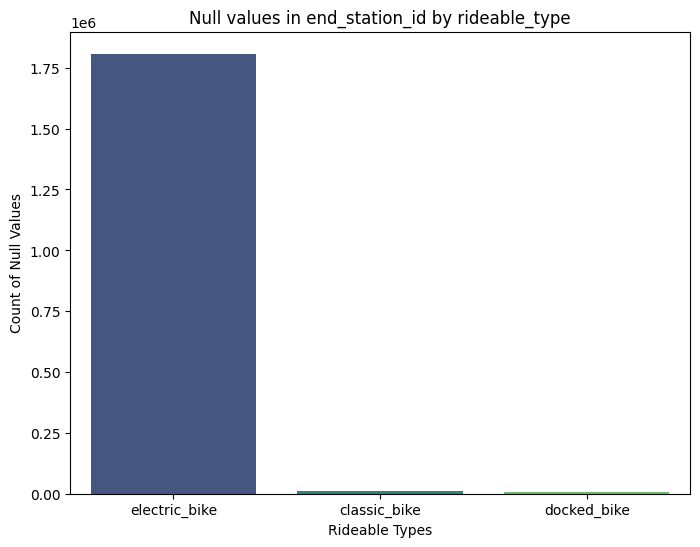

In [4]:
null_end_station_id_data = whole_data.filter(col("end_station_id").isNull())

# Count the null values grouped by 'rideable_type'
null_counts = (
    null_end_station_id_data.groupBy("rideable_type")
    .agg(count("*").alias("null_count"))
    .orderBy("null_count", ascending=False)
)

# Convert the PySpark DataFrame to Pandas for visualization
null_counts_pd = null_counts.toPandas()

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=null_counts_pd["rideable_type"], y=null_counts_pd["null_count"], palette="viridis")
plt.title("Null values in end_station_id by rideable_type")
plt.xlabel("Rideable Types")
plt.ylabel("Count of Null Values")
plt.show()

<ipython-input-5-0771bc6b2bf6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rideable_type_counts_pd["rideable_type"], y=rideable_type_counts_pd["counts"], palette="viridis")


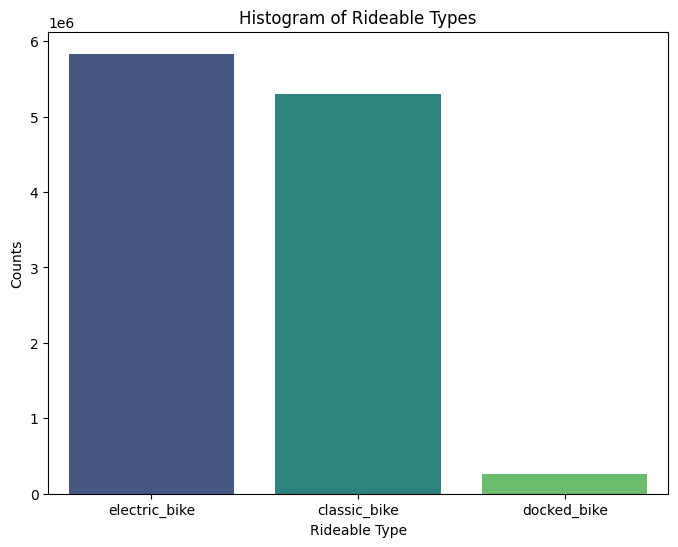

In [5]:
rideable_type_counts = (
    whole_data.groupBy("rideable_type")
    .agg(count("*").alias("counts"))
    .orderBy("counts", ascending=False)
)

# Step 2: Convert to Pandas DataFrame for visualization
rideable_type_counts_pd = rideable_type_counts.toPandas()

# Step 3: Plot the histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=rideable_type_counts_pd["rideable_type"], y=rideable_type_counts_pd["counts"], palette="viridis")
plt.xlabel("Rideable Type")
plt.ylabel("Counts")
plt.title("Histogram of Rideable Types")
plt.show()

In [6]:
dropping_columns_for_part_A = ['end_station_name', 'end_station_id', 'end_lat', 'end_lng']
whole_part_A_Processed = whole_data.drop(*dropping_columns_for_part_A)

# Step 2: Drop rows with null values in 'start_station_id'
whole_part_A_Processed = whole_part_A_Processed.na.drop(subset=['start_station_id'])

# Step 3: Count null values in each column
null_counts = whole_part_A_Processed.select([
    (col(c).isNull().cast("int")).alias(c) for c in whole_part_A_Processed.columns
]).agg(*[
    sum(col(c)).alias(c) for c in whole_part_A_Processed.columns
])

# Show the null value counts
null_counts.show()

+-------+-------------+----------+--------+------------------+----------------+---------+---------+-------------+
|ride_id|rideable_type|started_at|ended_at|start_station_name|start_station_id|start_lat|start_lng|member_casual|
+-------+-------------+----------+--------+------------------+----------------+---------+---------+-------------+
|      0|            0|         0|       0|                 0|               0|        0|        0|            0|
+-------+-------------+----------+--------+------------------+----------------+---------+---------+-------------+



In [7]:
num_rows = whole_part_A_Processed.count()

# Get the number of columns
num_columns = len(whole_part_A_Processed.columns)

# Print the shape
print(f"Shape: ({num_rows}, {num_columns})")

Shape: (9678682, 9)


# Creating the mean_latitude and mean_longitude for each unique start_station_id to refer the station witht their latitude and longitude.

In [8]:
from pyspark.sql import functions as F

# Calculate mean latitude and longitude for each start_station_id
means_df = whole_part_A_Processed.groupBy("start_station_id").agg(
    F.mean("start_lat").alias("mean_latitude"),
    F.mean("start_lng").alias("mean_longitude")
)

# Join the means back to the original DataFrame
whole_part_A_Processed = whole_part_A_Processed.join(
    means_df,
    on="start_station_id",
    how="left"
)

# Show the resulting DataFrame
whole_part_A_Processed.show()

+----------------+----------------+-------------+-------------------+-------------------+--------------------+------------------+------------------+-------------+------------------+------------------+
|start_station_id|         ride_id|rideable_type|         started_at|           ended_at|  start_station_name|         start_lat|         start_lng|member_casual|     mean_latitude|    mean_longitude|
+----------------+----------------+-------------+-------------------+-------------------+--------------------+------------------+------------------+-------------+------------------+------------------+
|    TA1309000002|DDC963BFDDA51EEA| classic_bike|2022-01-20 01:31:10|2022-01-20 01:37:12|Michigan Ave & Ja...|          41.87785|         -87.62408|       member|41.877959132113894|-87.62410632611108|
|    TA1309000002|E119D4E6BF686601|electric_bike|2022-01-08 05:36:40|2022-01-08 05:46:40|Michigan Ave & Ja...| 41.87784933333333|        -87.624056|       casual|41.877959132113894|-87.62410632611

In [9]:
whole_part_A_Processed.show(5)

+----------------+----------------+-------------+-------------------+-------------------+--------------------+-------------+--------------+-------------+------------------+------------------+
|start_station_id|         ride_id|rideable_type|         started_at|           ended_at|  start_station_name|    start_lat|     start_lng|member_casual|     mean_latitude|    mean_longitude|
+----------------+----------------+-------------+-------------------+-------------------+--------------------+-------------+--------------+-------------+------------------+------------------+
|    TA1309000002|DDC963BFDDA51EEA| classic_bike|2022-01-20 01:31:10|2022-01-20 01:37:12|Michigan Ave & Ja...|     41.87785|     -87.62408|       member|41.877959132113894|-87.62410632611108|
|             525|C2F7DD78E82EC875|electric_bike|2022-01-13 11:59:47|2022-01-13 12:02:44|Glenwood Ave & To...|   42.0128005|    -87.665906|       casual| 42.01209642672297|-87.66623784641001|
|             525|A6CF8980A652D272|elect

In [10]:
columns_not_needed = ["ride_id", "ended_at", "start_station_name", "start_station_id", "start_lat", "start_lng"]

# Drop the columns
whole_part_A_Processed = whole_part_A_Processed.drop(*columns_not_needed)

# Show the first few rows
whole_part_A_Processed.show(5)

+-------------+-------------------+-------------+------------------+------------------+
|rideable_type|         started_at|member_casual|     mean_latitude|    mean_longitude|
+-------------+-------------------+-------------+------------------+------------------+
| classic_bike|2022-01-20 01:31:10|       member|41.877959132113894|-87.62410632611108|
|electric_bike|2022-01-13 11:59:47|       casual| 42.01209642672297|-87.66623784641001|
|electric_bike|2022-01-10 08:41:56|       casual| 42.01209642672297|-87.66623784641001|
| classic_bike|2022-01-04 00:18:04|       casual| 41.98356195572525|-87.66917198862319|
| classic_bike|2022-01-25 04:53:40|       member|41.925594933358134|-87.65371090925457|
+-------------+-------------------+-------------+------------------+------------------+
only showing top 5 rows



In [11]:
whole_part_A_divvy_processed = whole_part_A_Processed

# Grouping the dataframe to get the total number of rides from each unique latitude and longitude set.

In [12]:
from pyspark.sql.functions import col, to_date, count

# Convert 'started_at' column to date format
whole_part_A_divvy_processed = whole_part_A_divvy_processed.withColumn('date', to_date(col('started_at')))

# Group by mean_latitude, mean_longitude, and date and count the number of rides for each group
grouped = whole_part_A_divvy_processed.groupBy('mean_latitude', 'mean_longitude', 'date') \
    .agg(count('rideable_type').alias('ride_count'))

# Show the result
grouped.show(5)

+------------------+------------------+----------+----------+
|     mean_latitude|    mean_longitude|      date|ride_count|
+------------------+------------------+----------+----------+
|41.919944054546505|-87.64884828432706|2022-02-11|        18|
| 41.94304117507918|-87.68730012686402|2022-04-06|         4|
|41.878124090182766|-87.64404281296741|2022-02-23|        10|
|41.878124090182766|-87.64404281296741|2022-04-01|        30|
| 41.87593901364749|-87.63068336039059|2022-03-30|        11|
+------------------+------------------+----------+----------+
only showing top 5 rows



In [13]:
grouped = grouped.withColumn('date', to_date('date'))

# Adding columns is_holiday and is_weekend columns

In [14]:
from pyspark.sql.functions import col, dayofweek, to_date
from pyspark.sql import functions as F

# Sample holidays list
holidays = [
    '2021-12-31', '2022-01-17', '2022-02-11', '2022-02-21',
    '2022-05-30', '2022-06-20', '2022-07-04', '2022-09-05',
    '2022-10-10', '2022-11-08', '2022-11-11', '2022-11-24',
    '2022-11-25', '2022-12-26',
    '2023-01-02', '2023-01-16', '2023-02-13', '2023-02-20',
    '2023-05-29', '2023-06-19', '2023-07-04', '2023-09-04',
    '2023-10-09', '2023-11-10', '2023-11-23', '2023-11-24',
    '2023-12-25'
]

# Convert the holiday dates to a PySpark column
holidays_column = F.array(*[F.lit(date) for date in holidays])

# Add a 'is_weekday' column, where 1 indicates a weekday and 0 indicates a weekend
grouped = grouped.withColumn("is_weekday",
                             F.when(dayofweek('date') <= 5, 1).otherwise(0))

# Add 'is_holiday' column by checking if 'date' is in the holiday list
grouped = grouped.withColumn("is_holiday",
                             F.col("date").cast("string").isin(holidays))

# Show the final result
grouped.show()

+------------------+------------------+----------+----------+----------+----------+
|     mean_latitude|    mean_longitude|      date|ride_count|is_weekday|is_holiday|
+------------------+------------------+----------+----------+----------+----------+
|41.919944054546505|-87.64884828432706|2022-02-11|        18|         0|      true|
| 41.94304117507918|-87.68730012686402|2022-04-06|         4|         1|     false|
|41.878124090182766|-87.64404281296741|2022-02-23|        10|         1|     false|
|41.878124090182766|-87.64404281296741|2022-04-01|        30|         0|     false|
| 41.87593901364749|-87.63068336039059|2022-03-30|        11|         1|     false|
| 41.90316994298406|-87.63444388368865|2022-04-13|        44|         1|     false|
|41.837809866599706| -87.6511515888454|2022-01-15|         2|         0|     false|
|  41.8984169131258|-87.68658986163125|2022-04-08|        10|         0|     false|
|41.902345765021614|-87.62775505783299|2022-04-27|        30|         1|    

In [15]:
num_rows = grouped.count()
num_columns = len(grouped.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 472885
Number of columns: 6


In [17]:
from pyspark.sql.functions import avg

# Calculate the mean of the 'ride_count' column
mean_ride_count = grouped.agg(avg("ride_count")).collect()[0][0]

# Print the mean
print(f"Mean of ride_count: {mean_ride_count}")

Mean of ride_count: 20.467306004631148


# Loading Weather Data

In [18]:
weather_data1 = spark.read.csv("./weather_2022_2023.csv", header=True, inferSchema=True)
weather_data2 = spark.read.csv("./weather_2023_2024.csv", header=True, inferSchema=True)

# Concatenate the DataFrames
weather_data = weather_data1.union(weather_data2)

# Show the first few rows of the concatenated DataFrame
weather_data.show()

+-------+----------+-------+-------+-----+------------+------------+---------+-----+--------+------+----------+-----------+----------+----+---------+--------+---------+-------+----------------+----------+----------+--------------+-----------+-------+----------+-------------------+-------------------+---------+--------------------+--------------------+-----------------+--------------------+
|   name|  datetime|tempmax|tempmin| temp|feelslikemax|feelslikemin|feelslike|  dew|humidity|precip|precipprob|precipcover|preciptype|snow|snowdepth|windgust|windspeed|winddir|sealevelpressure|cloudcover|visibility|solarradiation|solarenergy|uvindex|severerisk|            sunrise|             sunset|moonphase|          conditions|         description|             icon|            stations|
+-------+----------+-------+-------+-----+------------+------------+---------+-----+--------+------+----------+-----------+----------+----+---------+--------+---------+-------+----------------+----------+----------

In [19]:
null_counts = weather_data.select([sum(col(c).isNull().cast("int")).alias(c) for c in weather_data.columns])

# Show the null counts for each column
null_counts.show()

+----+--------+-------+-------+----+------------+------------+---------+---+--------+------+----------+-----------+----------+----+---------+--------+---------+-------+----------------+----------+----------+--------------+-----------+-------+----------+-------+------+---------+----------+-----------+----+--------+
|name|datetime|tempmax|tempmin|temp|feelslikemax|feelslikemin|feelslike|dew|humidity|precip|precipprob|precipcover|preciptype|snow|snowdepth|windgust|windspeed|winddir|sealevelpressure|cloudcover|visibility|solarradiation|solarenergy|uvindex|severerisk|sunrise|sunset|moonphase|conditions|description|icon|stations|
+----+--------+-------+-------+----+------------+------------+---------+---+--------+------+----------+-----------+----------+----+---------+--------+---------+-------+----------------+----------+----------+--------------+-----------+-------+----------+-------+------+---------+----------+-----------+----+--------+
|   0|       0|      0|      0|   0|           0|   

In [20]:
weather_data = weather_data.withColumn('datetime', to_date(weather_data['datetime']))

# Show the transformed data
weather_data.show()

+-------+----------+-------+-------+-----+------------+------------+---------+-----+--------+------+----------+-----------+----------+----+---------+--------+---------+-------+----------------+----------+----------+--------------+-----------+-------+----------+-------------------+-------------------+---------+--------------------+--------------------+-----------------+--------------------+
|   name|  datetime|tempmax|tempmin| temp|feelslikemax|feelslikemin|feelslike|  dew|humidity|precip|precipprob|precipcover|preciptype|snow|snowdepth|windgust|windspeed|winddir|sealevelpressure|cloudcover|visibility|solarradiation|solarenergy|uvindex|severerisk|            sunrise|             sunset|moonphase|          conditions|         description|             icon|            stations|
+-------+----------+-------+-------+-----+------------+------------+---------+-----+--------+------+----------+-----------+----------+----+---------+--------+---------+-------+----------------+----------+----------

# Merging the weather data and the bike ride count data.

In [21]:
merged_df = grouped.join(weather_data, grouped['date'] == weather_data['datetime'], how='inner')

# Get the shape of the resulting DataFrame
merged_df_count = merged_df.count(), len(merged_df.columns)

# Show the merged DataFrame
merged_df.show()

# Print the shape
print(f'Merged DataFrame shape: {merged_df_count}')

+------------------+------------------+----------+----------+----------+----------+-------+----------+-------+-------+----+------------+------------+---------+-----+--------+------+----------+-----------+----------+----+---------+--------+---------+-------+----------------+----------+----------+--------------+-----------+-------+----------+-------------------+-------------------+---------+--------------------+--------------------+-----------------+--------------------+
|     mean_latitude|    mean_longitude|      date|ride_count|is_weekday|is_holiday|   name|  datetime|tempmax|tempmin|temp|feelslikemax|feelslikemin|feelslike|  dew|humidity|precip|precipprob|precipcover|preciptype|snow|snowdepth|windgust|windspeed|winddir|sealevelpressure|cloudcover|visibility|solarradiation|solarenergy|uvindex|severerisk|            sunrise|             sunset|moonphase|          conditions|         description|             icon|            stations|
+------------------+------------------+----------+--

In [22]:
null_counts = merged_df.select([count(when(col(c).isNull(), c)).alias(c) for c in merged_df.columns])

# Show the null counts
null_counts.show()

+-------------+--------------+----+----------+----------+----------+----+--------+-------+-------+----+------------+------------+---------+---+--------+------+----------+-----------+----------+----+---------+--------+---------+-------+----------------+----------+----------+--------------+-----------+-------+----------+-------+------+---------+----------+-----------+----+--------+
|mean_latitude|mean_longitude|date|ride_count|is_weekday|is_holiday|name|datetime|tempmax|tempmin|temp|feelslikemax|feelslikemin|feelslike|dew|humidity|precip|precipprob|precipcover|preciptype|snow|snowdepth|windgust|windspeed|winddir|sealevelpressure|cloudcover|visibility|solarradiation|solarenergy|uvindex|severerisk|sunrise|sunset|moonphase|conditions|description|icon|stations|
+-------------+--------------+----+----------+----------+----------+----+--------+-------+-------+----+------------+------------+---------+---+--------+------+----------+-----------+----------+----+---------+--------+---------+-------

# Filling the Null Values in the dataset with mean of the respective columns.

In [23]:
severerisk_mean = merged_df.select(F.mean('severerisk')).collect()[0][0]
windgust_mean = merged_df.select(F.mean('windgust')).collect()[0][0]

# Fill the null values with the respective means
merged_df = merged_df.fillna({'severerisk': severerisk_mean, 'windgust': windgust_mean})

# To check if there are still any null values in the DataFrame
null_counts = merged_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in merged_df.columns])

# Show the result
null_counts.show()

+-------------+--------------+----+----------+----------+----------+----+--------+-------+-------+----+------------+------------+---------+---+--------+------+----------+-----------+----------+----+---------+--------+---------+-------+----------------+----------+----------+--------------+-----------+-------+----------+-------+------+---------+----------+-----------+----+--------+
|mean_latitude|mean_longitude|date|ride_count|is_weekday|is_holiday|name|datetime|tempmax|tempmin|temp|feelslikemax|feelslikemin|feelslike|dew|humidity|precip|precipprob|precipcover|preciptype|snow|snowdepth|windgust|windspeed|winddir|sealevelpressure|cloudcover|visibility|solarradiation|solarenergy|uvindex|severerisk|sunrise|sunset|moonphase|conditions|description|icon|stations|
+-------------+--------------+----+----------+----------+----------+----+--------+-------+-------+----+------------+------------+---------+---+--------+------+----------+-----------+----------+----+---------+--------+---------+-------

In [24]:
merged_df.printSchema()

root
 |-- mean_latitude: double (nullable = true)
 |-- mean_longitude: double (nullable = true)
 |-- date: date (nullable = true)
 |-- ride_count: long (nullable = false)
 |-- is_weekday: integer (nullable = false)
 |-- is_holiday: boolean (nullable = true)
 |-- name: string (nullable = true)
 |-- datetime: date (nullable = true)
 |-- tempmax: double (nullable = true)
 |-- tempmin: double (nullable = true)
 |-- temp: double (nullable = true)
 |-- feelslikemax: double (nullable = true)
 |-- feelslikemin: double (nullable = true)
 |-- feelslike: double (nullable = true)
 |-- dew: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- precip: double (nullable = true)
 |-- precipprob: integer (nullable = true)
 |-- precipcover: double (nullable = true)
 |-- preciptype: string (nullable = true)
 |-- snow: double (nullable = true)
 |-- snowdepth: double (nullable = true)
 |-- windgust: double (nullable = false)
 |-- windspeed: double (nullable = true)
 |-- winddir: double (nul

# Correlatip Heat Map between Columns in the final dataframe.

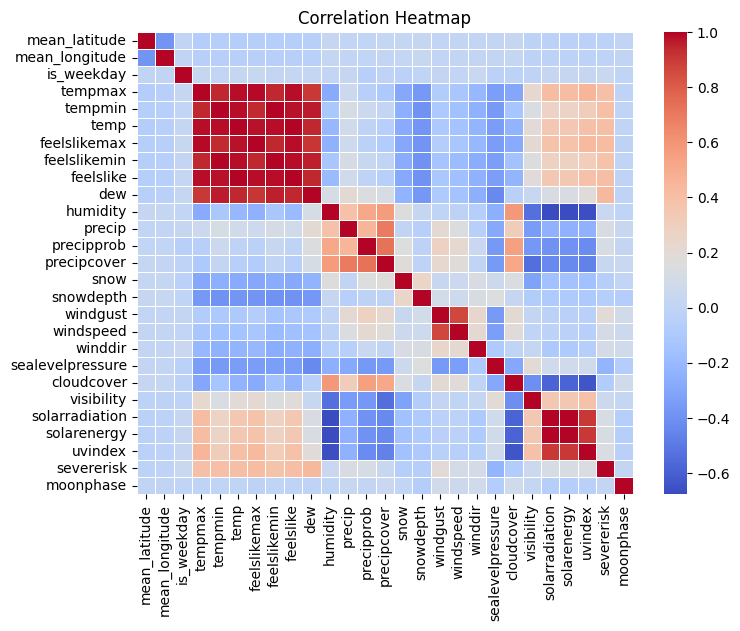

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import functions as F

# Select numerical columns (you can specify your columns or use a subset of columns)
numerical_columns = [col for col, dtype in merged_df.dtypes if dtype in ['int', 'double']]

# Assemble the numerical features into a single vector column
assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
merged_df_with_features = assembler.transform(merged_df)

# Compute the correlation matrix
correlation_matrix = Correlation.corr(merged_df_with_features, 'features').head()[0]

# Convert the correlation matrix to a Pandas DataFrame
import numpy as np
import pandas as pd

# Convert the correlation matrix to a numpy array
corr_array = correlation_matrix.toArray()

# Convert the numpy array to a pandas DataFrame for easier plotting
corr_df = pd.DataFrame(corr_array, columns=numerical_columns, index=numerical_columns)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Removing some heavily corelated columns and considering only important features.

In [37]:
required_columns = ["mean_latitude", "mean_longitude", "ride_count", "is_weekday", "is_holiday", "temp", "humidity", "precip", "precipprob",
                   "precipcover", "snow", "snowdepth", "windgust", "windspeed", "winddir", "sealevelpressure", "cloudcover",
                   "visibility", "solarenergy", "severerisk", "moonphase"]

# Select the required columns from the merged DataFrame
merged_df_filtered = merged_df.select(*required_columns)

# Get the number of rows and columns
num_rows = merged_df_filtered.count()
num_columns = len(merged_df_filtered.columns)

# Print the shape
print(f"Shape of the DataFrame: ({num_rows}, {num_columns})")

Shape of the DataFrame: (472885, 21)


In [38]:
merged_df_filtered = merged_df_filtered.withColumn(
    "is_holiday",
    F.when(merged_df_filtered["is_holiday"] == True, 1).otherwise(0)
)

# Show the transformed DataFrame
merged_df_filtered.show(5)

+------------------+------------------+----------+----------+----------+----+--------+------+----------+-----------+----+---------+--------+---------+-------+----------------+----------+----------+-----------+----------+---------+
|     mean_latitude|    mean_longitude|ride_count|is_weekday|is_holiday|temp|humidity|precip|precipprob|precipcover|snow|snowdepth|windgust|windspeed|winddir|sealevelpressure|cloudcover|visibility|solarenergy|severerisk|moonphase|
+------------------+------------------+----------+----------+----------+----+--------+------+----------+-----------+----+---------+--------+---------+-------+----------------+----------+----------+-----------+----------+---------+
|41.919944054546505|-87.64884828432706|        18|         0|         1| 3.0|    75.0| 3.027|       100|      16.67| 0.0|      2.6|    66.7|     35.2|  250.8|          1003.8|      95.5|      14.4|        4.9|        10|     0.34|
| 41.94304117507918|-87.68730012686402|         4|         1|         0|11.1

In [39]:
merged_df_filtered.printSchema()

root
 |-- mean_latitude: double (nullable = true)
 |-- mean_longitude: double (nullable = true)
 |-- ride_count: long (nullable = false)
 |-- is_weekday: integer (nullable = false)
 |-- is_holiday: integer (nullable = false)
 |-- temp: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- precip: double (nullable = true)
 |-- precipprob: integer (nullable = true)
 |-- precipcover: double (nullable = true)
 |-- snow: double (nullable = true)
 |-- snowdepth: double (nullable = true)
 |-- windgust: double (nullable = false)
 |-- windspeed: double (nullable = true)
 |-- winddir: double (nullable = true)
 |-- sealevelpressure: double (nullable = true)
 |-- cloudcover: double (nullable = true)
 |-- visibility: double (nullable = true)
 |-- solarenergy: double (nullable = true)
 |-- severerisk: integer (nullable = true)
 |-- moonphase: double (nullable = true)



# Random Forest Regressor Model

In [40]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import functions as F

label_column = 'ride_count'
feature_columns = [col for col in merged_df_filtered.columns if col != label_column]

# Ensure that train_data and test_data have the same columns (features)
train_data = merged_df_filtered.select(*feature_columns, label_column).filter(col(label_column).isNotNull())
test_data = merged_df_filtered.select(*feature_columns, label_column).filter(col(label_column).isNotNull())

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
assembled_train_data = assembler.transform(train_data)
assembled_test_data = assembler.transform(test_data)

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(featuresCol="features", labelCol=label_column, numTrees=100, seed=42)

# Train the model
rf_model = rf.fit(assembled_train_data)

# Make predictions on the test data
predictions = rf_model.transform(assembled_test_data)

# Evaluate the model
evaluator_rmse = RegressionEvaluator(labelCol=label_column, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=label_column, predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 22.89626906531526
R-squared (R2): 0.45822097034612785


# Gradient Bossing Tree Regressor Model

In [41]:
from pyspark.ml.regression import GBTRegressor

gbt = GBTRegressor(featuresCol="features", labelCol=label_column, maxIter=100, seed=42)

# Train the model
gbt_model = gbt.fit(assembled_train_data)

# Make predictions on the test data
predictions = gbt_model.transform(assembled_test_data)

# Evaluate the model
evaluator_rmse = RegressionEvaluator(labelCol=label_column, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=label_column, predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 16.43360924885722
R-squared (R2): 0.7209007538162548


# Decision Tree Regression model

In [43]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize the DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol="features", labelCol=label_column, maxDepth=5, seed=42)

# Train the model
dt_model = dt.fit(assembled_train_data)

# Make predictions on the test data
predictions = dt_model.transform(assembled_test_data)

# Evaluate the model
evaluator_rmse = RegressionEvaluator(labelCol=label_column, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=label_column, predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 22.176116919798588
R-squared (R2): 0.4917659519951417


# Linear Regression Model

In [45]:
from pyspark.ml.regression import LinearRegression

# Initialize the LinearRegression model
lr = LinearRegression(featuresCol="features", labelCol=label_column, maxIter=100, regParam=0.0, elasticNetParam=0.0)

# Train the model
lr_model = lr.fit(assembled_train_data)

# Make predictions on the test data
predictions = lr_model.transform(assembled_test_data)

# Evaluate the model
evaluator_rmse = RegressionEvaluator(labelCol=label_column, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=label_column, predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 27.9370607521981
R-squared (R2): 0.19340750761812697
